# Natural Language Processing Hacker News Upvote Prediction

In [1]:
import pandas as pd
import numpy as np

submissions = pd.read_csv("sel_hn_stories.csv")
submissions.columns = ["submission_time", "upvotes", "url", "headline"]
submissions.shape

(2999, 4)

#### Remove Missing Values

In [2]:
print(submissions.isnull().sum(),"\n")
submissions = submissions.dropna()
print(submissions.isnull().sum(), "\n")
print(submissions.shape)

submission_time      0
upvotes              0
url                189
headline            10
dtype: int64 

submission_time    0
upvotes            0
url                0
headline           0
dtype: int64 

(2800, 4)


#### Into Arrays

In [3]:
headlines = np.asarray(submissions["headline"])
upvotes = np.asarray(submissions["upvotes"])

In [4]:
headlines

array(['Software: Sadly we did adopt from the construction analogy',
       ' Google’s Stock Split Means More Control for Larry and Sergey ',
       'SSL DOS attack tool released exploiting negotiation overhead', ...,
       'Nissan CEO: We will have an autonomous vehicle next year',
       'Connecting to Dropbox with Python',
       'Crowdsourcing disaster response What we learn from Japan'], dtype=object)

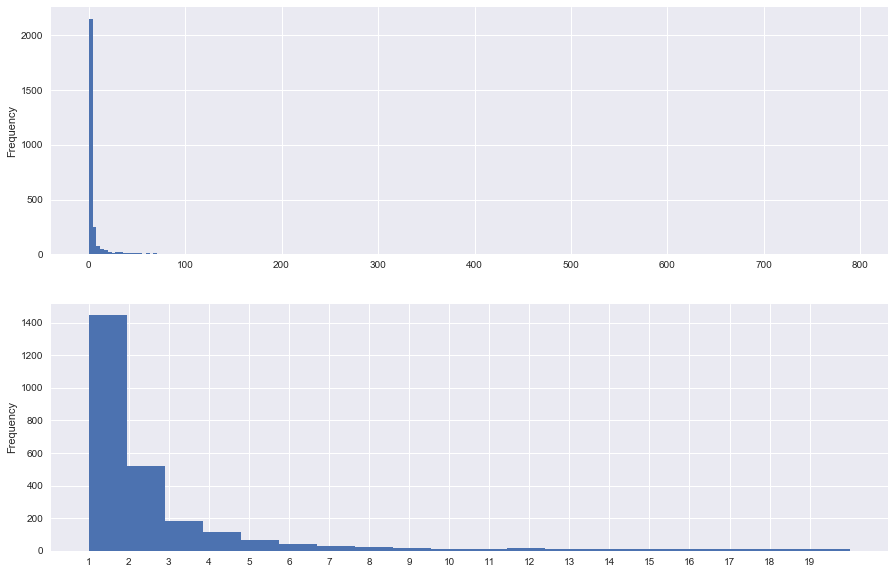

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
pd.Series(upvotes).plot.hist(bins=200, figsize=(15,10), ax=ax1)
pd.Series(upvotes).plot.hist(bins=20, figsize=(15,10), range=(1,20), xticks=range(1,20), ax=ax2)

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(lowercase=True, encoding="utf-8")
X = vectorizer.fit_transform(headlines)
words = vectorizer.get_feature_names()
X = X.toarray()
X = pd.DataFrame(X, columns=words)

In [7]:
X.head()

,001,039,04,05,06,07,08,0alpha4,10,100,...,zipwhip,zlata,zombie,zombies,zone,zooms,zu,zuckerberg,zune,zustimmung
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Remove Words with <5 and >100 Occurrences

In [8]:
wordcounts = X.sum()
X = X.loc[:,(wordcounts>5)&(wordcounts<100)]

In [9]:
X.head()

,10,100,11,12,14,20,2010,2011,2012,2013,...,working,world,worth,would,writing,www,yahoo,year,years,youtube
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, upvotes, test_size=0.2, random_state=1)

In [11]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print ("RMSE Score:", np.sqrt(mean_squared_error(y_test, predictions)))

RMSE Score: 51.4140489842


In [12]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print ("RMSE Score:", np.sqrt(mean_squared_error(y_test, predictions)))

RMSE Score: 48.0565377579


In [13]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor()
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print ("RMSE Score:", np.sqrt(mean_squared_error(y_test, predictions)))

RMSE Score: 51.6584231866


In [14]:
from sklearn.neural_network import MLPRegressor
clf = MLPRegressor()
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print ("RMSE Score:", np.sqrt(mean_squared_error(y_test, predictions)))

RMSE Score: 49.9797794525


C:\Program Files\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# Making only Predictions for <10 Upvotes (which we have enough data for)

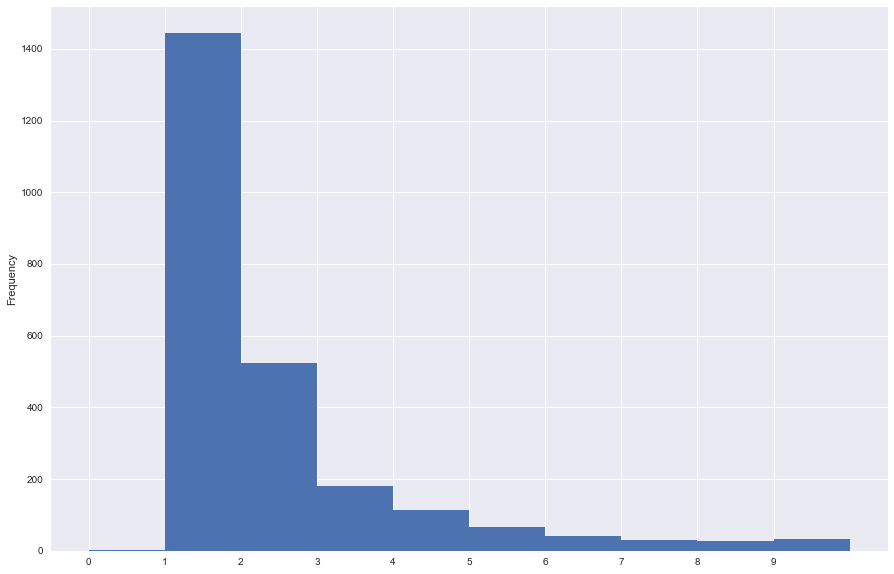

In [15]:
submissions = pd.read_csv("sel_hn_stories.csv")
submissions.columns = ["submission_time", "upvotes", "url", "headline"]
submissions = submissions.dropna()
submissions = submissions.loc[submissions["upvotes"]<=10]

headlines = np.asarray(submissions["headline"])
upvotes = np.asarray(submissions["upvotes"])

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.Series(upvotes).plot.hist(bins=10, figsize=(15,10), range=(0,10), xticks=range(0,10))

In [16]:
vectorizer = CountVectorizer(lowercase=True, encoding="utf-8")
X = vectorizer.fit_transform(headlines)
words = vectorizer.get_feature_names()
X = X.toarray()
X = pd.DataFrame(X, columns=words)

In [17]:
X.head()

,001,039,04,05,06,07,08,0alpha4,10,100,...,zipwhip,zlata,zombie,zombies,zone,zooms,zu,zuckerberg,zune,zustimmung
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
wordcounts = X.sum()
X = X.loc[:,(wordcounts>5)&(wordcounts<100)]

In [19]:
X.head()

,10,100,11,12,14,2010,2011,2012,2013,2014,...,world,worth,would,writing,www,yahoo,year,years,you,youtube
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, upvotes, test_size=0.2, random_state=1)

In [21]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print ("RMSE Score:", np.sqrt(mean_squared_error(y_test, predictions)))

RMSE Score: 1.83255175338


In [22]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print ("RMSE Score:", np.sqrt(mean_squared_error(y_test, predictions)))

RMSE Score: 1.78260876554


In [23]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor()
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print ("RMSE Score:", np.sqrt(mean_squared_error(y_test, predictions)))

RMSE Score: 1.97358795583


In [24]:
from sklearn.neural_network import MLPRegressor
clf = MLPRegressor()
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print ("RMSE Score:", np.sqrt(mean_squared_error(y_test, predictions)))

RMSE Score: 1.9828032732
